In [1]:
import scipy.io
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import numpy as np

In [2]:
import h5py

In [3]:
all_data_dir =  "/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH"
print(os.listdir(all_data_dir))

['metadata.csv', 'data_df.csv', 'data_df_no1.csv', 'records']


In [5]:
data_dir = all_data_dir + "/records"
t = os.listdir(data_dir)

In [6]:
a = h5py.File("/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH/records/A10623.h5", 'r')

In [7]:
a.keys()

<KeysViewHDF5 ['ecg']>

In [8]:
data = a['ecg']

In [9]:
print(len(data))

12


In [10]:
data1 = np.array(data)

In [11]:
clip_data = data[:, 500:3000]

In [12]:
print(type(clip_data[0]))

<class 'numpy.ndarray'>


In [20]:
# label_df = pd.read_csv("/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH/metadata.csv")
label_df = pd.read_csv("/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH/data_df_no1.csv")

In [21]:
print(label_df)

       Unnamed: 0 File name  Label  New Label
0               0    A00002      1          0
1               1    A00003      1          0
2               2    A00004     23          3
3               3    A00005    146         27
4               4    A00006      1          0
...           ...       ...    ...        ...
20830       20830    A25765      1          0
20831       20831    A25766    146         27
20832       20832    A25767     23          3
20833       20833    A25768    147         28
20834       20834    A25770     23          3

[20835 rows x 4 columns]


In [23]:
# label_column = label_df['AHA_Code']
# file_name_column = label_df['ECG_ID']
label_df['Label'].value_counts()

1      13903
22      1312
147     1115
23       878
105      838
146      505
145      468
106      390
21       385
60       175
50       169
125      165
120      102
30        86
121       83
101       56
104       46
36        29
155       27
142       23
108       21
82        16
80         9
54         8
51         6
83         5
102        4
88         4
140        3
31         2
152        2
Name: Label, dtype: int64

In [12]:
single_file_name = []
single_label = []
file_name = []
label = []

for i in range (len(label_column)):
    all = label_column[i].split(";")
    if len(all) == 1:
        single_label.append(label_column[i])
        data_file = file_name_column[i]
        single_file_name.append(data_file)  

for i in range (len(single_label)):
    all1 = single_label[i].split("+")
    if len(all1) == 1:
        label.append(int(single_label[i]))
        file_name.append(single_file_name[i])   

NameError: name 'label_column' is not defined

In [133]:
print(len(single_file_name))

22046


In [134]:
data_dict = {'File name' : file_name, 'Label' : label}

In [135]:
data_df = pd.DataFrame(data=data_dict)

In [142]:
print(drop_df)

      File name  Label
0        A00002      1
1        A00003      1
2        A00004     23
3        A00005    146
4        A00006      1
...         ...    ...
20833    A25765      1
20834    A25766    146
20835    A25767     23
20836    A25768    147
20837    A25770     23

[20792 rows x 2 columns]


In [30]:
# data_df['Label'].value_counts()
# [80, 54, 51, 83, 102, 88, 140, 31, 152, 84, 165, 148]

1      13903
22      1312
147     1115
23       878
105      838
146      505
145      468
106      390
21       385
60       175
50       169
125      165
120      102
30        86
121       83
101       56
104       46
36        29
155       27
142       23
108       21
82        16
Name: Label, dtype: int64

In [139]:
drop_df = None
for idx, drop_cls in enumerate([80, 54, 51, 83, 102, 88, 140, 31, 152, 84, 165, 148]):
    if idx == 0:
        drop_df = data_df[data_df['Label'] != drop_cls]
    else:
        drop_df = drop_df[drop_df['Label'] != drop_cls]

In [140]:
label = drop_df['Label']
print(label)

0          1
1          1
2         23
3        146
4          1
        ... 
20833      1
20834    146
20835     23
20836    147
20837     23
Name: Label, Length: 20792, dtype: int64


In [144]:
label = list(drop_df['Label'])
file_name = list(drop_df['File name'])

In [165]:
drop_data = {'File name' : file_name, 'Label' : label}
drop_data_df = pd.DataFrame(drop_data)

In [166]:
x = np.array(label)
t = np.unique(x)
t = list(t)
# t = enumerate(t)

In [167]:
d = dict(enumerate(t))

In [168]:
print(d)

{0: 1, 1: 21, 2: 22, 3: 23, 4: 30, 5: 36, 6: 50, 7: 60, 8: 82, 9: 101, 10: 104, 11: 105, 12: 106, 13: 108, 14: 120, 15: 121, 16: 125, 17: 142, 18: 145, 19: 146, 20: 147, 21: 155}


In [169]:
new_labels = []

for t in drop_data_df['Label']:
    new_label = list(d.keys())[list(d.values()).index(t)]
    new_labels.append(new_label)

In [170]:
new_label = {'New Label' : new_labels}

In [174]:
new_label_df = pd.DataFrame(new_label)
print(new_label_df)
data_df_new = pd.concat([drop_data_df, new_label_df], axis=1)

       New Label
0              0
1              0
2              3
3             19
4              0
...          ...
20787          0
20788         19
20789          3
20790         20
20791          3

[20792 rows x 1 columns]


In [175]:
data_df_new 

,File name,Label,New Label
0,A00002,1,0
1,A00003,1,0
2,A00004,23,3
3,A00005,146,19
4,A00006,1,0
...,...,...,...
20787,A25765,1,0
20788,A25766,146,19
20789,A25767,23,3
20790,A25768,147,20


In [176]:
data_df_dir = all_data_dir + "/data_df.csv"
data_df_new.to_csv(data_df_dir) 

In [53]:
data_path = "/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH/records/A25770.h5"
filename = data_path.split("/")[-1].split(".")[0]
label = data_df[data_df["File name"] == filename]["New Label"].values.item()
print(label)

3


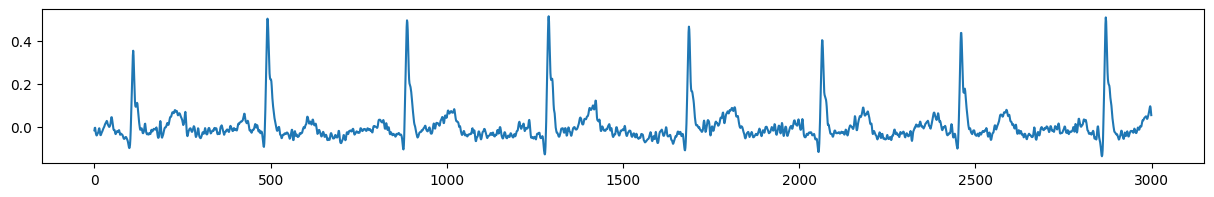

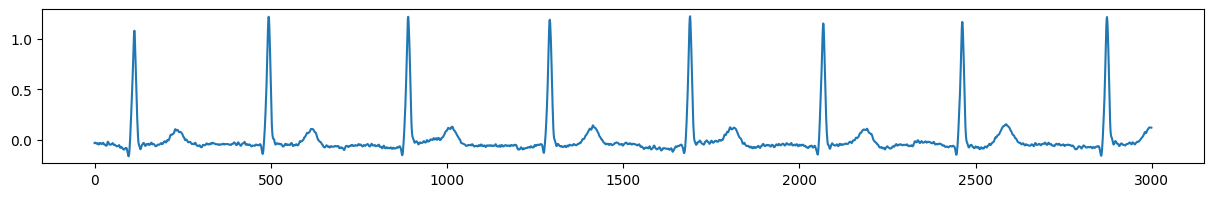

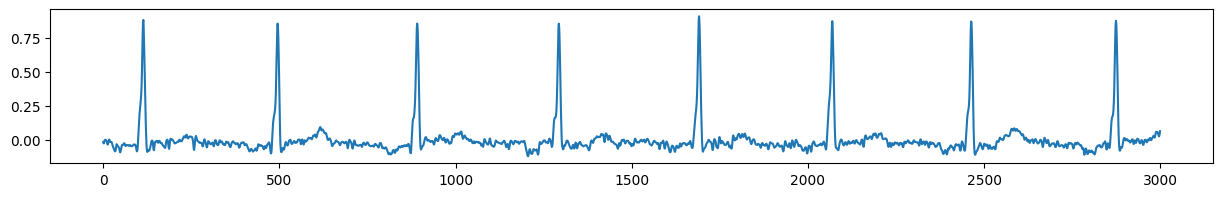

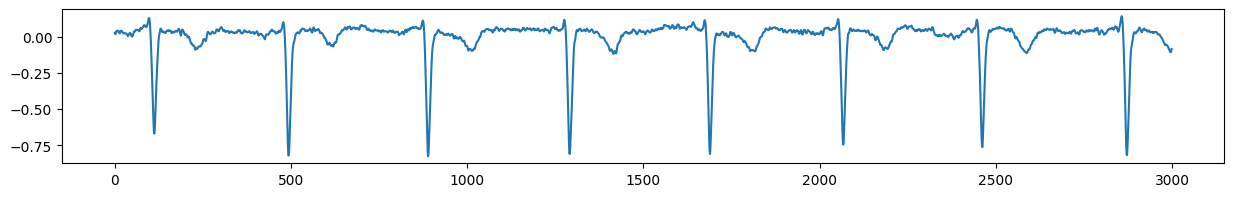

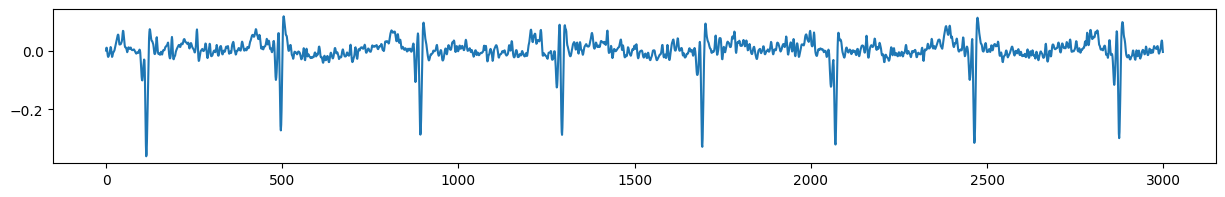

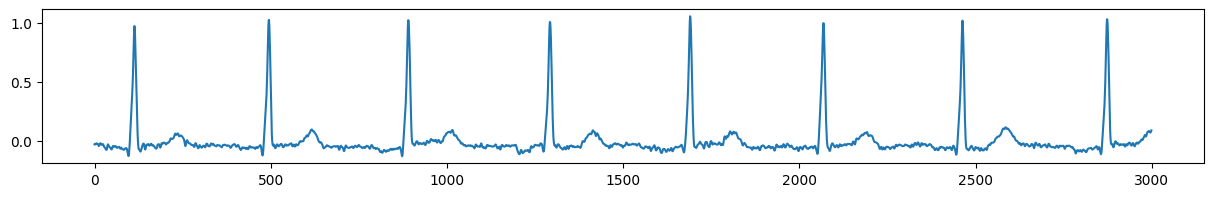

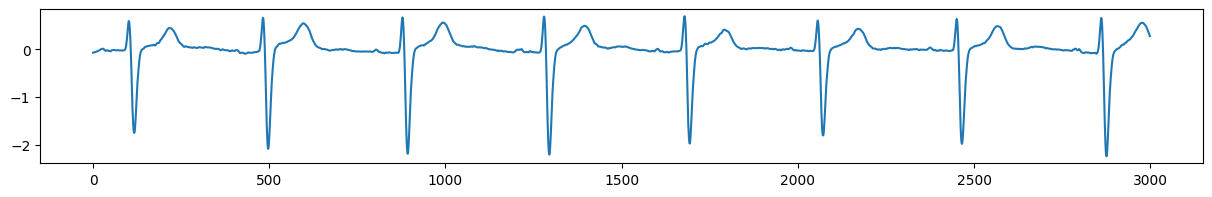

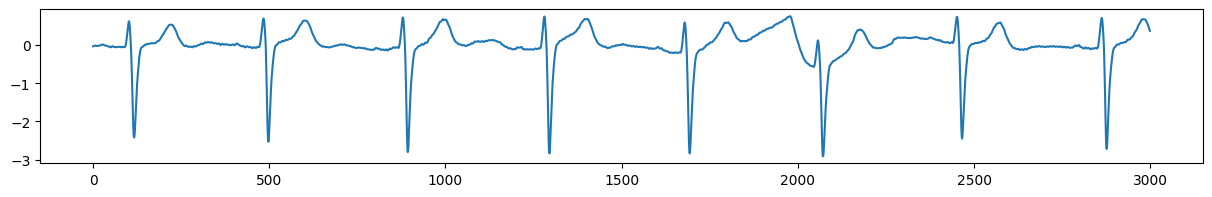

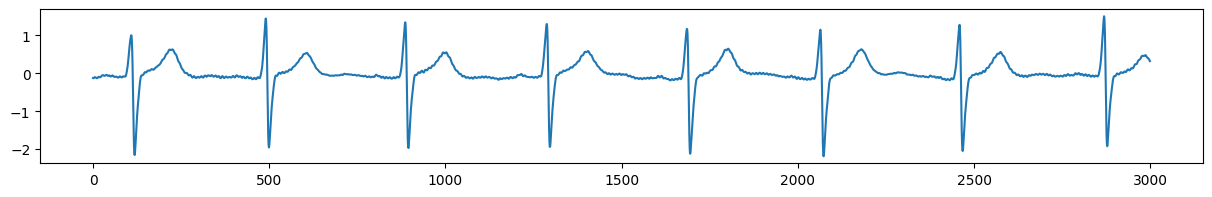

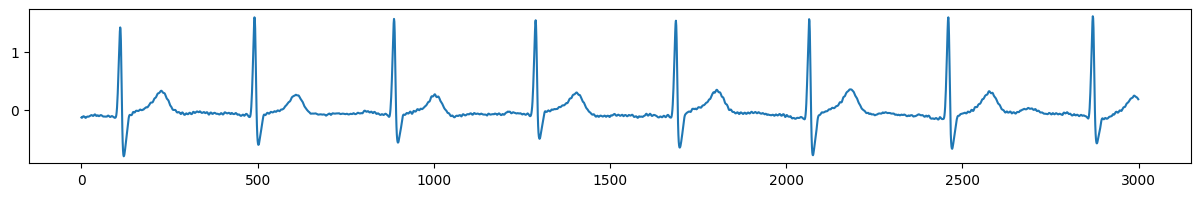

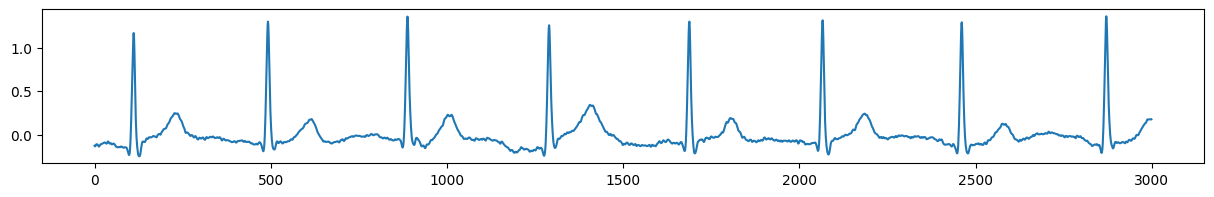

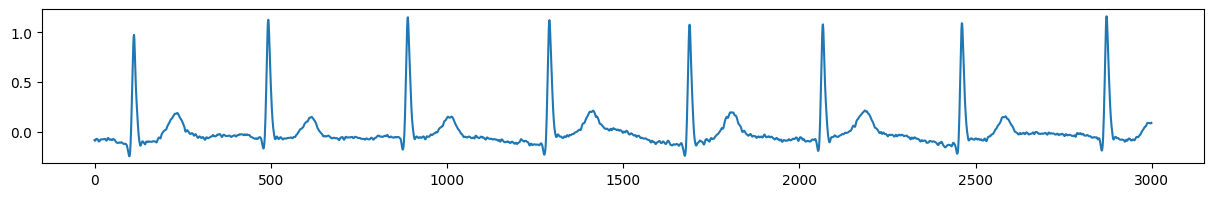

In [84]:
def plots(i):
    plt.figure(figsize = (15,2))
    plt.plot(data1[i][:3000])

for i in range(12):
    if i % 1 ==0:
        plots(i)
# save_dir =         
# plt.savefig()


torch.Size([48, 2500])


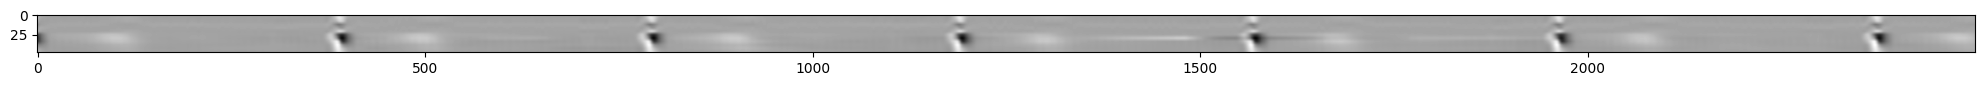

In [19]:
## Grayscale
clip_data = torch.tensor(clip_data, dtype=torch.float32)
normalized_data = (clip_data - clip_data.min()) / (clip_data.max() - clip_data.min())
grayscale_images = (normalized_data * 255)
grayscale_images = grayscale_images.unsqueeze(0).unsqueeze(0) # (1, 1, h, w)
resized_images = F.interpolate(grayscale_images, size=(12*4,2500), mode='bilinear', align_corners=True)
resized_images = resized_images.squeeze(0).squeeze(0)
print(resized_images.shape)
torch_data = resized_images.unsqueeze(0).repeat(3, 1, 1)
plt.figure(figsize=(25, 25))
plt.imshow(resized_images, cmap='gray', vmin=0, vmax=255)
plt.show()

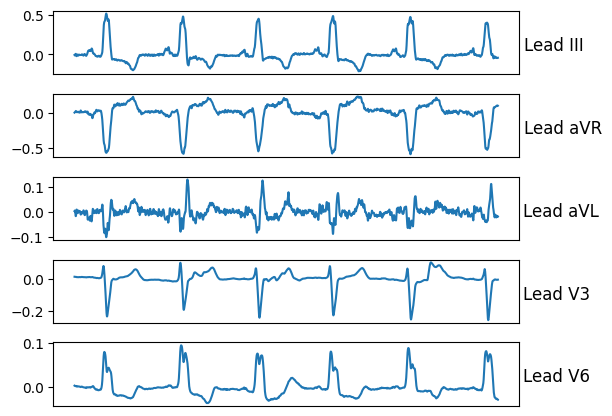

In [29]:
fig, axs = plt.subplots(5, 1)
axs[0].plot(a[2][2][500:3000], 'tab:blue')
axs[0].set_title('Lead III',x=1.075,y = 0.25)
axs[1].plot(a[2][3][500:3000], 'tab:blue')
axs[1].set_title('Lead aVR',x=1.095,y = 0.25)
axs[2].plot(a[2][4][500:3000], 'tab:blue')
axs[2].set_title('Lead aVL',x=1.09,y = 0.25)
axs[3].plot(a[2][9][500:3000]/10, 'tab:blue')
axs[3].set_title('Lead V3',x=1.08,y = 0.25)
axs[4].plot(a[2][11][500:3000]/10, 'tab:blue')
axs[4].set_title('Lead V6',x=1.08,y = 0.25)
axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[3].axes.get_xaxis().set_ticks([])
axs[4].axes.get_xaxis().set_ticks([])
plt.tight_layout(pad = 3, h_pad = 1, w_pad = 1)
bbox_inches='tight'
plt.savefig("/home/thaobeo/git/HeartResearch/ECGsig.pdf", format = 'pdf', dpi = 300)